In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import torch
from transformers import Trainer, TrainingArguments, BartForConditionalGeneration, BartTokenizer
from datasets import load_dataset, DatasetDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd
from datasets import load_dataset

# Load the dataset
train_dataset = load_dataset("cnn_dailymail", "3.0.0", split='train')
valid_dataset = load_dataset("cnn_dailymail", "3.0.0", split='validation')
test_dataset = load_dataset("cnn_dailymail", "3.0.0", split='test')

# Select a subset of the dataset
dataset_train = train_dataset.select(range(1000))
dataset_valid = valid_dataset.select(range(50))
dataset_test = test_dataset.select(range(50))

# Convert to Pandas DataFrame
train_df = dataset_train.to_pandas()
valid_df = dataset_valid.to_pandas()
test_df = dataset_test.to_pandas()

# Print the DataFrames
print("Training DataFrame:")
print(train_df.head())  # Display first 5 rows

print("\nValidation DataFrame:")
print(valid_df.head())  # Display first 5 rows

print("\nTest DataFrame:")
print(test_df.head())  # Display first 5 rows


Training DataFrame:
                                             article  \
0  LONDON, England (Reuters) -- Harry Potter star...   
1  Editor's note: In our Behind the Scenes series...   
2  MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...   
3  WASHINGTON (CNN) -- Doctors removed five small...   
4  (CNN)  -- The National Football League has ind...   

                                          highlights  \
0  Harry Potter star Daniel Radcliffe gets £20M f...   
1  Mentally ill inmates in Miami are housed on th...   
2  NEW: "I thought I was going to die," driver sa...   
3  Five small polyps found during procedure; "non...   
4  NEW: NFL chief, Atlanta Falcons owner critical...   

                                         id  
0  42c027e4ff9730fbb3de84c1af0d2c506e41c3e4  
1  ee8871b15c50d0db17b0179a6d2beab35065f1e9  
2  06352019a19ae31e527f37f7571c6dd7f0c5da37  
3  24521a2abb2e1f5e34e6824e0f9e56904a2b0e88  
4  7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a  

Validation DataFrame:
       

In [8]:
train_df

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a
...,...,...,...
995,The mother of murdered schoolboy Damilola Tayl...,Mother of murdered schoolboy Damilola Taylor d...,2930e1a7ac24bce649bfbf5f5971e74515e38a0a
996,WASHINGTON (CNN) -- A smiling Pope Benedict XV...,NEW: Pope Benedict XVI arrives in Washington f...,f5f7571a69e96c1d288d939861b7216c2bdc0ae4
997,(CNN) -- Eight Florida teenagers -- six of the...,Eight Florida teens to be tried as adults in v...,5f02aa32bd1dc95e47355755398e31550b232f8a
998,(CNN) -- The following are excerpts from the H...,Judge on Heather Mills: Level of premarital we...,9177e5ac94f038749e8d4eb526a65461e0f6df4c


In [10]:
# Tokenizer and model initialization
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [43]:

# Function to convert text data into model inputs and targets
def preprocess_function(examples):
    inputs = [f"summarize: {article}" for article in examples['article']]
    model_inputs = tokenizer(
        inputs,
        max_length=512,
        truncation=True,
        padding='max_length'
    )

    # Set up the tokenizer for targets
    targets = [summary for summary in examples['highlights']]
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            targets,
            max_length=512,
            truncation=True,
            padding='max_length'
        )

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the function to the whole dataset
tokenized_train = dataset_train.map(
    preprocess_function,
    batched=True,
    num_proc=4
)
tokenized_valid = dataset_valid.map(
    preprocess_function,
    batched=True,
    num_proc=4
)

Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4114: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4114: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4114: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

Map (num_proc=4):   0%|          | 0/50 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4114: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4114: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4114: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your 

In [44]:
# Set up data collator (for padding)
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [45]:
pip install rouge_score

In [46]:
from sklearn.metrics import accuracy_score
import evaluate
import numpy as np
rouge = evaluate.load("rouge")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred.predictions[0], eval_pred.label_ids

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(
        predictions=decoded_preds,
        references=decoded_labels,
        use_stemmer=True,
        rouge_types=[
            'rouge1',
            'rouge2',
            'rougeL'
        ]
    )

    accuracy = accuracy_score(decoded_labels, decoded_preds)
    result["accuracy"] = accuracy

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [47]:
def preprocess_logits_for_metrics(logits, labels):
    """
    Original Trainer may have a memory leak.
    This is a workaround to avoid storing too many tensors that are not needed.
    """
    pred_ids = torch.argmax(logits[0], dim=-1)
    return pred_ids, labels

In [49]:
OUT_DIR = 'results_t5base'

training_args = TrainingArguments(
    output_dir=OUT_DIR,
    num_train_epochs=10,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir=OUT_DIR,
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=200,
    save_strategy='epoch',
    save_total_limit=2,
    report_to='tensorboard',
    learning_rate=0.0001,
    dataloader_num_workers=4
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_valid,
    preprocess_logits_for_metrics=preprocess_logits_for_metrics,
    compute_metrics=compute_metrics
)

history = trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Accuracy,Gen Len
200,0.025500,0.245532,0.573700,0.328100,0.546000,0.000000,42.080000
400,0.039100,0.234495,0.558400,0.306000,0.525400,0.000000,42.080000
600,0.054600,0.239600,0.537700,0.285700,0.508600,0.000000,42.080000
800,0.032200,0.245344,0.552000,0.293700,0.519200,0.000000,42.080000
1000,0.042100,0.237795,0.540800,0.286600,0.509200,0.000000,42.080000
1200,0.021000,0.245848,0.557500,0.310600,0.529100,0.000000,42.080000
1400,0.010600,0.273663,0.561600,0.307800,0.532000,0.000000,42.080000
1600,0.005700,0.281727,0.558700,0.302300,0.528300,0.000000,42.080000
1800,0.004300,0.297579,0.570300,0.306200,0.536600,0.000000,42.080000
2000,0.001700,0.303950,0.570800,0.314900,0.542000,0.000000,42.080000


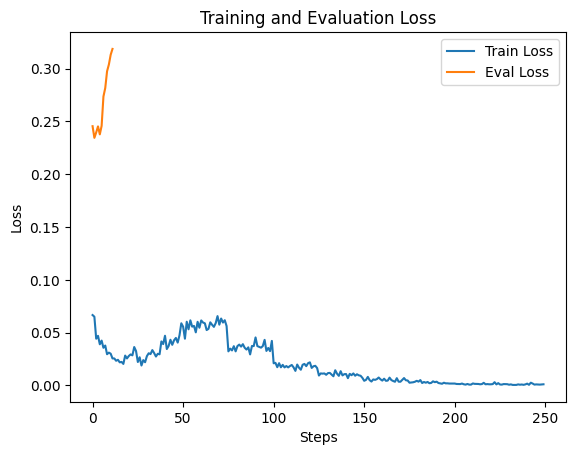

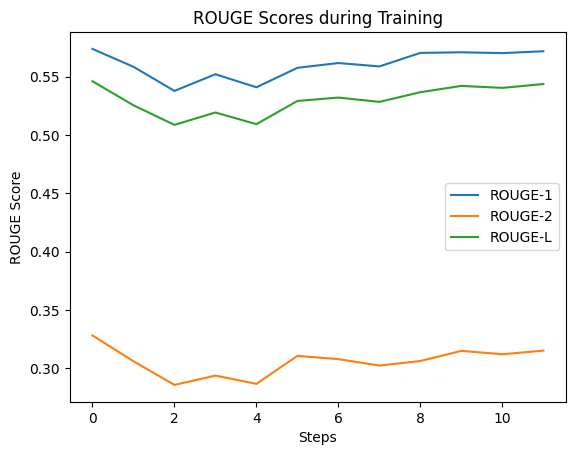

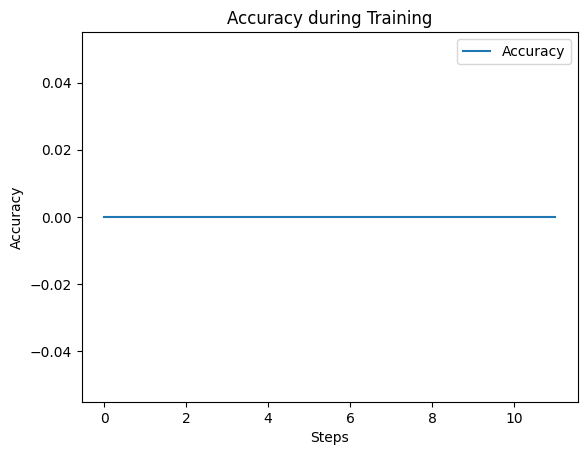

In [50]:
from transformers import Trainer, TrainingArguments
import matplotlib.pyplot as plt

# Access the log history for metrics like loss, accuracy, and ROUGE
log_history = trainer.state.log_history

# Extract specific metrics
train_loss = [entry['loss'] for entry in log_history if 'loss' in entry]
eval_loss = [entry['eval_loss'] for entry in log_history if 'eval_loss' in entry]
accuracy = [entry['eval_accuracy'] for entry in log_history if 'eval_accuracy' in entry]
rouge1 = [entry['eval_rouge1'] for entry in log_history if 'eval_rouge1' in entry]
rouge2 = [entry['eval_rouge2'] for entry in log_history if 'eval_rouge2' in entry]
rougeL = [entry['eval_rougeL'] for entry in log_history if 'eval_rougeL' in entry]

# Now you can plot these metrics using matplotlib
plt.plot(train_loss, label='Train Loss')
plt.plot(eval_loss, label='Eval Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()

plt.plot(rouge1, label='ROUGE-1')
plt.plot(rouge2, label='ROUGE-2')
plt.plot(rougeL, label='ROUGE-L')
plt.xlabel('Steps')
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores during Training')
plt.legend()
plt.show()

plt.plot(accuracy, label='Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training')
plt.legend()
plt.show()


In [51]:
SAVE_DIR = 'bart_model'

# Save the model
model.save_pretrained(SAVE_DIR)

# Save the tokenizer
tokenizer.save_pretrained(SAVE_DIR)

print(f"Model and tokenizer saved to {SAVE_DIR}")

Model and tokenizer saved to bart_model


In [52]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
import numpy as np

# Load the tokenizer and model
# MODEL = 't5-base'
# tokenizer = T5Tokenizer.from_pretrained(MODEL)
# model = T5ForConditionalGeneration.from_pretrained(MODEL).to("cuda" if torch.cuda.is_available() else "cpu")

def sample_from_logits(logits, temperature=1.0, top_k=50):
    """
    Sample a token from the logits using temperature and top-k sampling.
    """
    logits = logits / temperature  # Apply temperature scaling
    logits = logits.cpu().detach().numpy()  # Convert logits to numpy array

    # Apply top-k sampling
    top_k_indices = np.argsort(logits)[-top_k:]  # Get top-k indices
    top_k_logits = logits[top_k_indices]  # Get top-k logits
    top_k_probs = np.exp(top_k_logits) / np.sum(np.exp(top_k_logits))  # Compute probabilities
    selected_token = np.random.choice(top_k_indices, p=top_k_probs)  # Sample a token

    return selected_token

def generate_summary(input_text, tokenizer, model2, max_input_len=512, max_output_len=128, temperature=1.0, top_k=50):
    """
    Generate a summary using the T5 model with sampling.
    """
    # Step 1: Tokenize the input text
    input_ids = tokenizer.encode(
        input_text,
        max_length=max_input_len,
        truncation=True,
        return_tensors='pt',
        padding='max_length'
    ).to(model.device)

    # Step 2: Generate predictions
    output = model.generate(
        input_ids=input_ids,
        max_length=max_output_len,
        do_sample=True,
        temperature=temperature,
        top_k=top_k,
        num_return_sequences=1
    )

    # Step 3: Decode the generated output
    generated_summary = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_summary

# Example usage
input_text = '''Years ago, my favorite cracker was Keebler Club. One day, I saw the multi-grain version and thought I’d try it,
    especially since I enjoy whole-grain breads and am trying to lower cholesterol. I couldn’t believe the multi-grain
    version actually tastes better than the original! I bought several boxes of these crackers and always keep some on hand.
    I use them for Asian tuna salad, with Inglehoffer sweet honey mustard, or as spreads for soups. They are tasty crackers.
'''

summary = generate_summary(input_text, tokenizer, model, max_input_len=400, max_output_len=100, temperature=0.7, top_k=50)
print("Generated Summary:", summary)


Generated Summary: Multi-grain crackers taste better than the original .
I use them for Asian tuna salad, with Inglehoffer sweet honey mustard .
They are also good for soups and gluten-vegetable-loaf .
People over 6 feet tall or with broad shoulders may find uses for them .
